# Predicting Student Performances

Dataset: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
student = pd.read_csv("Student_performance_data.csv")
df = student.copy()

In [3]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [6]:
# We won't need the "StudentID" column

df.drop(columns=["StudentID"], inplace=True)

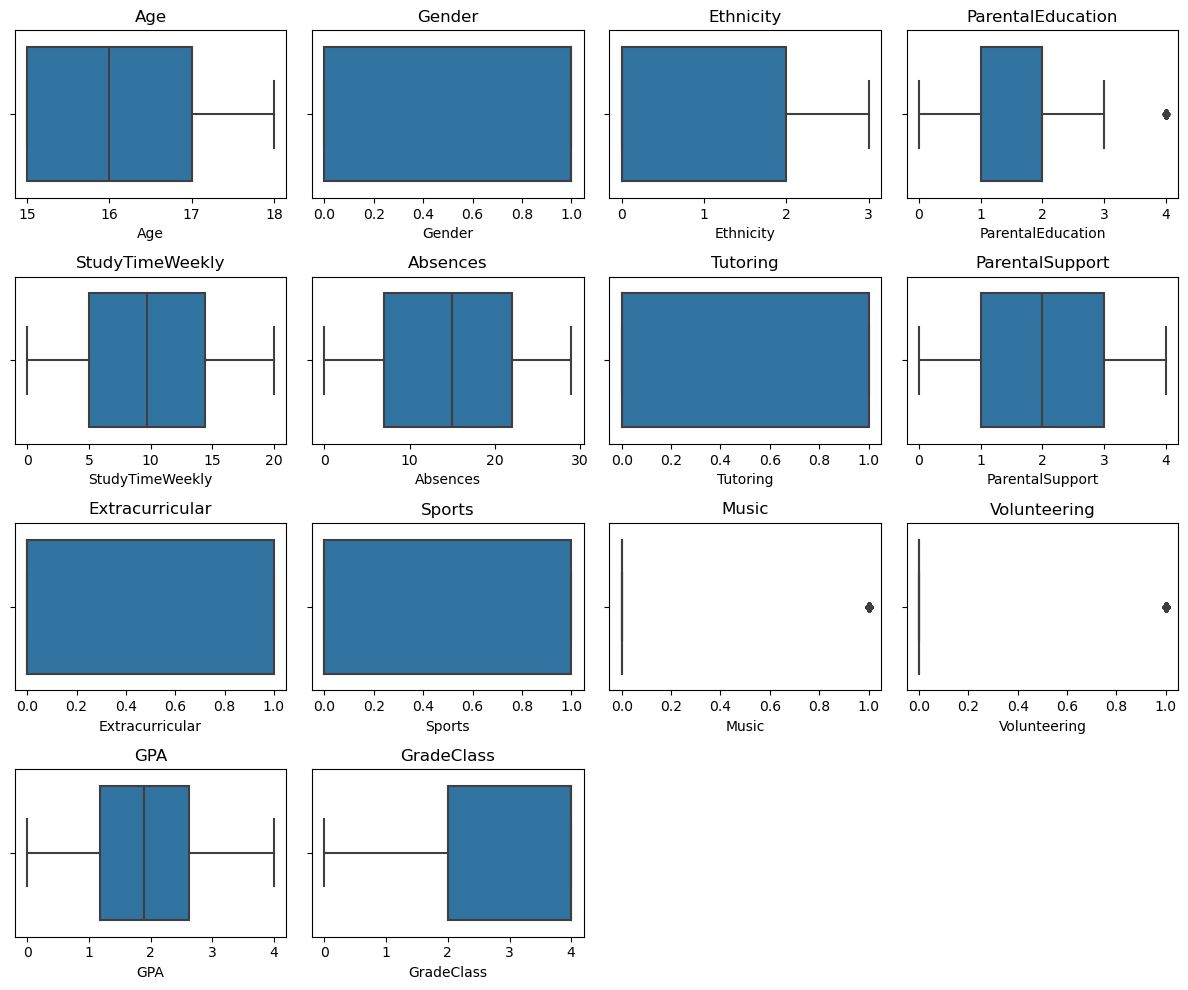

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(12, 10))

for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(column)
    
for i in range(len(df.columns), 4 * 4):
    fig.delaxes(axes[i // 4, i % 4])
    
plt.tight_layout()
plt.show()

There are no outliers to handle.

In [8]:
duplicated_rows = df.duplicated()
df[duplicated_rows]

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass


There are no duplicated rows.

## Analyzing Relationships

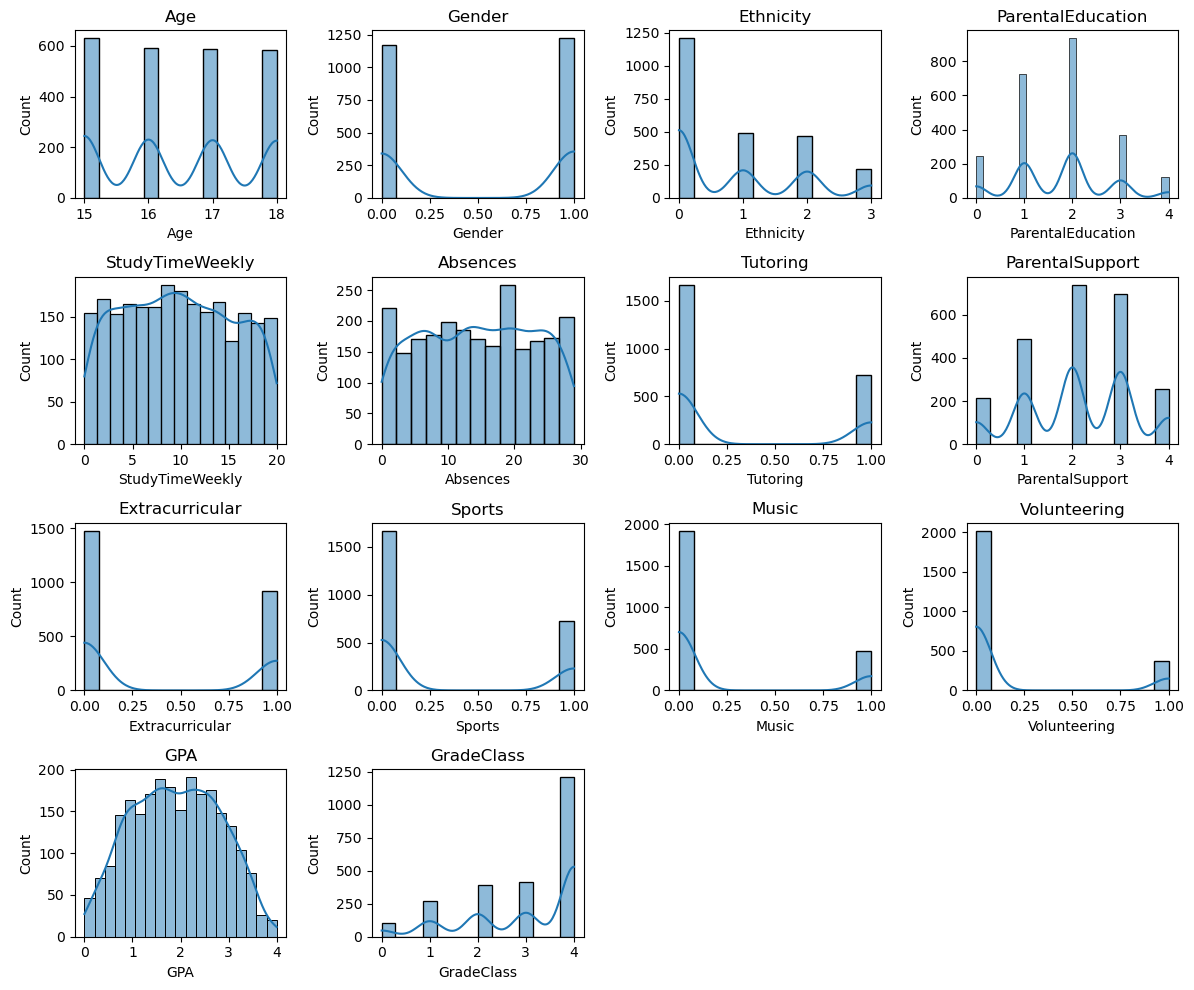

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(12, 10))

for i, column in enumerate(df.columns):
    sns.histplot(x=df[column], kde=True, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(column)
    
for i in range(len(df.columns), 4 * 4):
    fig.delaxes(axes[i // 4, i % 4])
    
plt.tight_layout()
plt.show()

In [10]:
corr_matrix = df.corr()
corr_GradeClass = corr_matrix["GradeClass"].sort_values(ascending=False)

corr_GradeClass

GradeClass           1.000000
Absences             0.728633
ParentalEducation    0.041031
Gender               0.022998
Volunteering         0.013156
Age                 -0.006250
Ethnicity           -0.023326
Sports              -0.026654
Music               -0.036065
Extracurricular     -0.069733
Tutoring            -0.111695
StudyTimeWeekly     -0.134131
ParentalSupport     -0.136823
GPA                 -0.782835
Name: GradeClass, dtype: float64

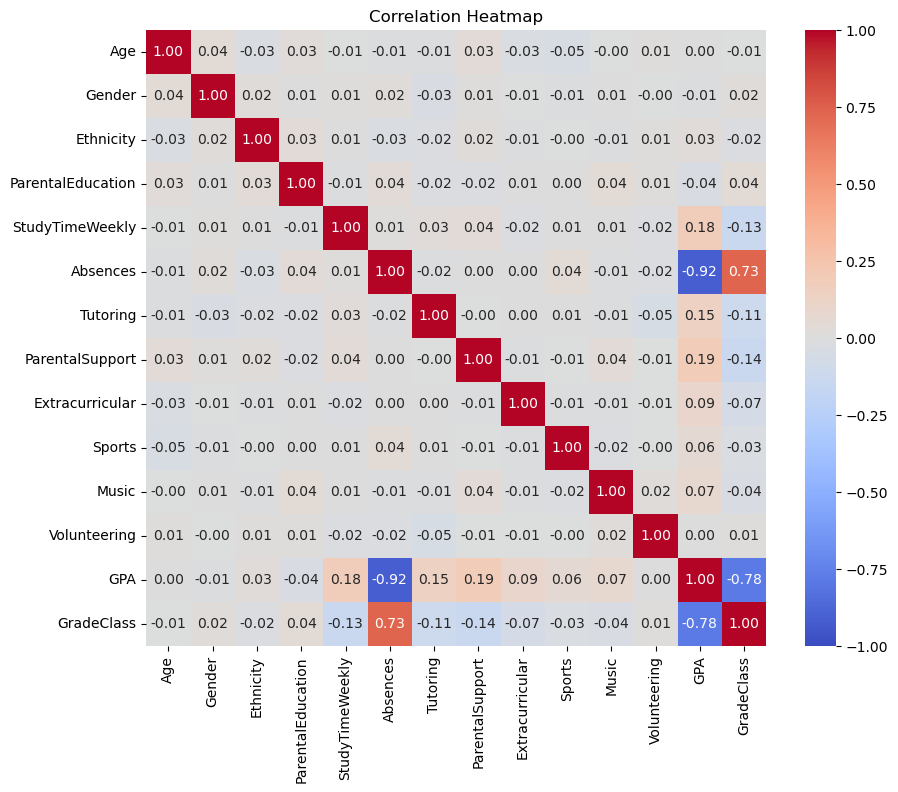

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

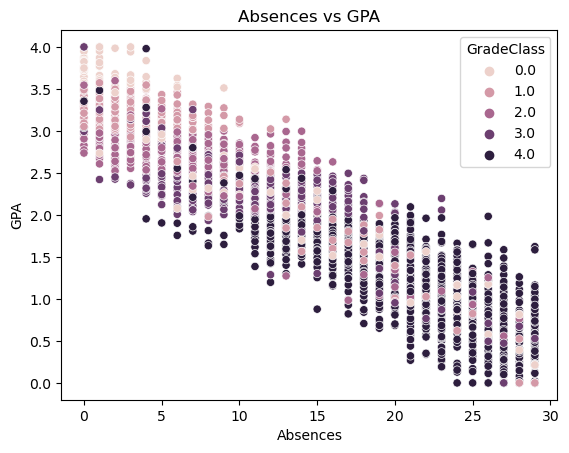

In [12]:
sns.scatterplot(x="Absences", y="GPA", data=df, hue="GradeClass")
plt.title("Absences vs GPA")
plt.show()

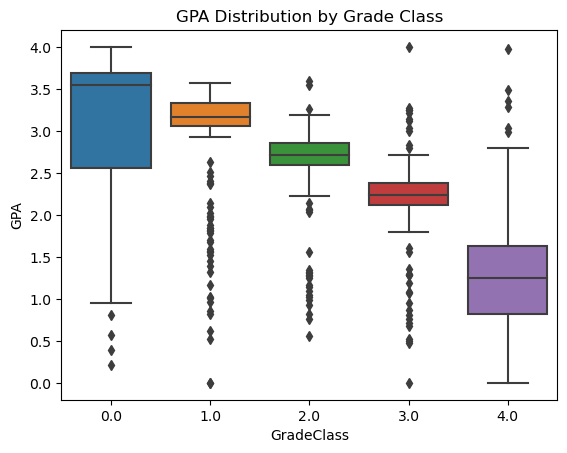

In [13]:
sns.boxplot(x="GradeClass", y="GPA", data=df)
plt.title("GPA Distribution by Grade Class")
plt.show()

There is a slight problem classifying GradeClass based on GPAs.

In [14]:
df.drop(columns=["GradeClass"], inplace=True, errors="ignore")

df["GradeClass"] = pd.cut(df["GPA"], bins=[-float("inf"), 2.0, 2.5, 3.0, 3.5, float("inf")],
                          labels=[4, 3, 2, 1, 0])

df["GradeClass"] = df["GradeClass"].astype(int)

print(df[["GPA", "GradeClass"]])

           GPA  GradeClass
0     2.929196           2
1     3.042915           1
2     0.112602           4
3     2.054218           3
4     1.288061           4
...        ...         ...
2387  3.455509           1
2388  3.279150           1
2389  1.142333           4
2390  1.803297           4
2391  2.140014           3

[2392 rows x 2 columns]


In [15]:
df["GradeClass"].value_counts()

GradeClass
4    1274
3     412
2     385
1     244
0      77
Name: count, dtype: int64

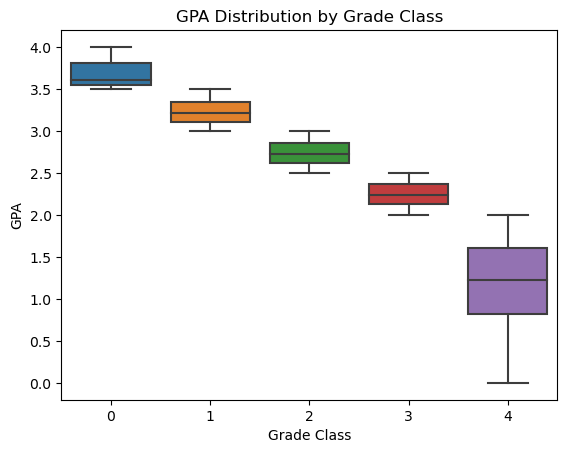

In [16]:
sns.boxplot(x="GradeClass", y="GPA", data=df, order=[0, 1, 2, 3, 4])
plt.title("GPA Distribution by Grade Class")
plt.xlabel("Grade Class")
plt.ylabel("GPA")
plt.show()

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.0,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


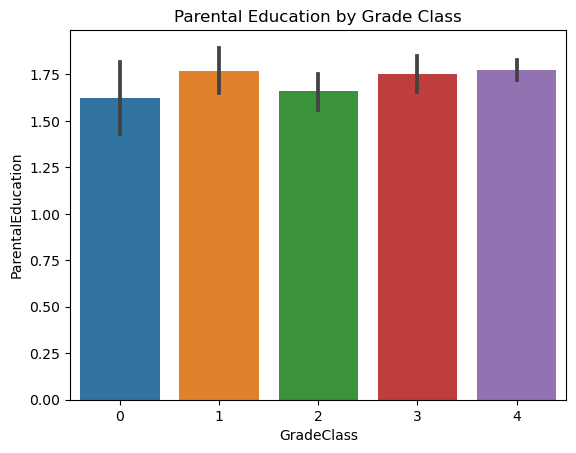

In [18]:
sns.barplot(data=df, x="GradeClass", y="ParentalEducation")
plt.title("Parental Education by Grade Class")
plt.show()

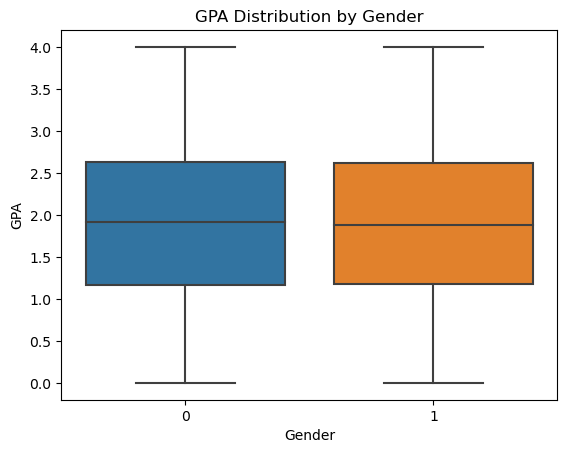

In [19]:
sns.boxplot(x="Gender", y="GPA", data=df)
plt.title("GPA Distribution by Gender")
plt.show()

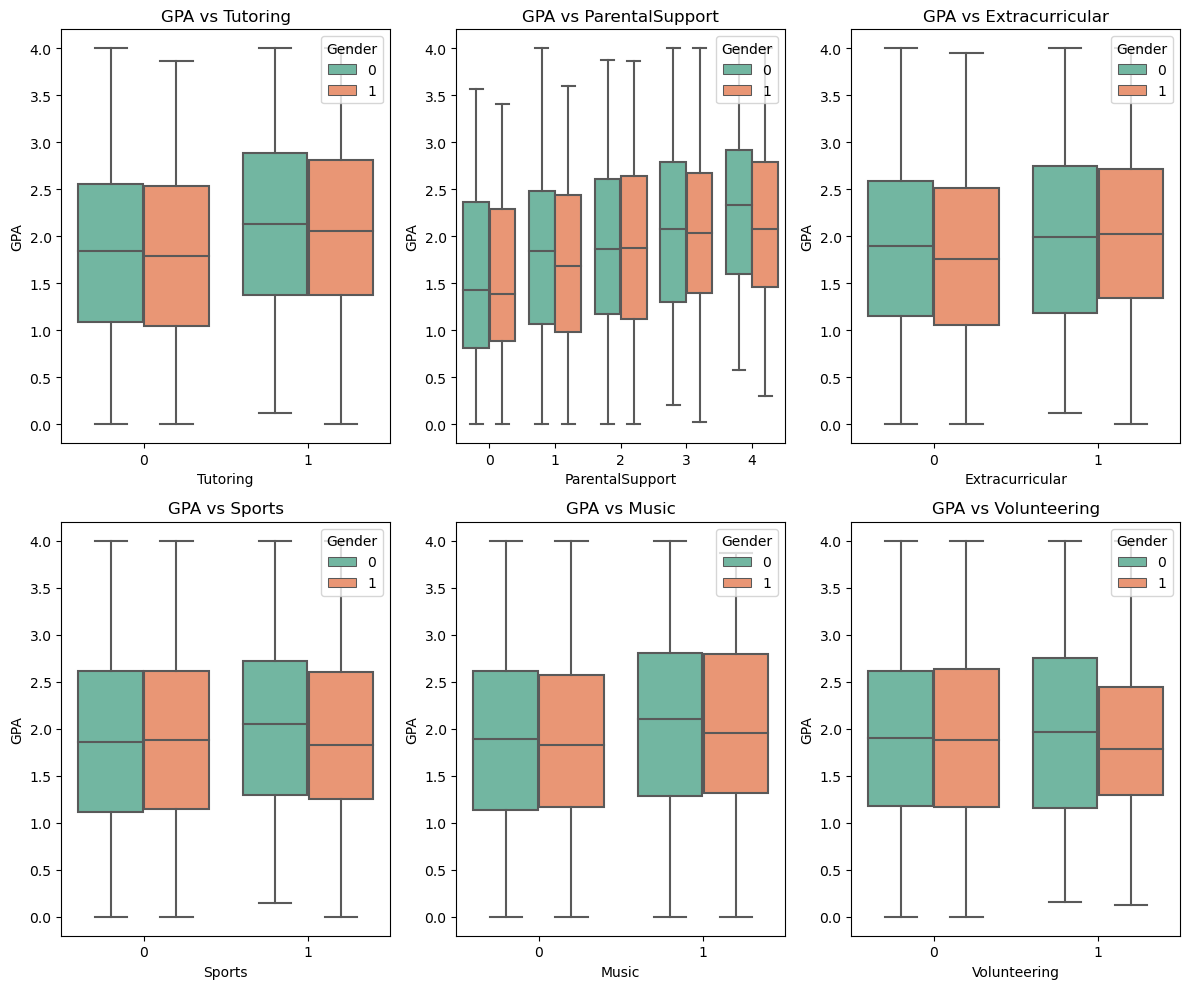

In [20]:
columns = df[["Tutoring", "ParentalSupport", "Extracurricular", "Sports", "Music", "Volunteering"]]

fig, axes = plt.subplots(2, 3, figsize=(12, 10))

for i, column in enumerate(columns):
    sns.boxplot(x=df[column], y=df["GPA"], hue=df["Gender"], palette="Set2", ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"GPA vs {column}")
    axes[i // 3, i % 3].legend(title="Gender", loc="upper right")
    
plt.tight_layout()
plt.show()

## Modeling

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
df.dtypes

Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass             int32
dtype: object

In [23]:
y = df["GradeClass"]
X = df.drop(columns=["GradeClass"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier()

In [26]:
param_grid = {
    "n_neighbors": np.arange(1, 21),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
}

In [27]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_knn_model = grid_search.best_estimator_
print("Best parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


In [28]:
best_knn_model.fit(X_train, y_train)

y_pred = best_knn_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.774247491638796


#### Analysis

In [29]:
accuracy_score(y_test, y_pred)

0.774247491638796

In [30]:
confusion_matrix(y_test, y_pred)

array([[  4,  16,   0,   0,   0],
       [  5,  35,  24,   1,   0],
       [  0,  11,  68,  21,   0],
       [  0,   0,  16,  62,  26],
       [  0,   0,   0,  15, 294]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.20      0.28        20
           1       0.56      0.54      0.55        65
           2       0.63      0.68      0.65       100
           3       0.63      0.60      0.61       104
           4       0.92      0.95      0.93       309

    accuracy                           0.77       598
   macro avg       0.64      0.59      0.61       598
weighted avg       0.77      0.77      0.77       598



We have poor scores for the 0 class because the dataset contains a low number of samples for this class.

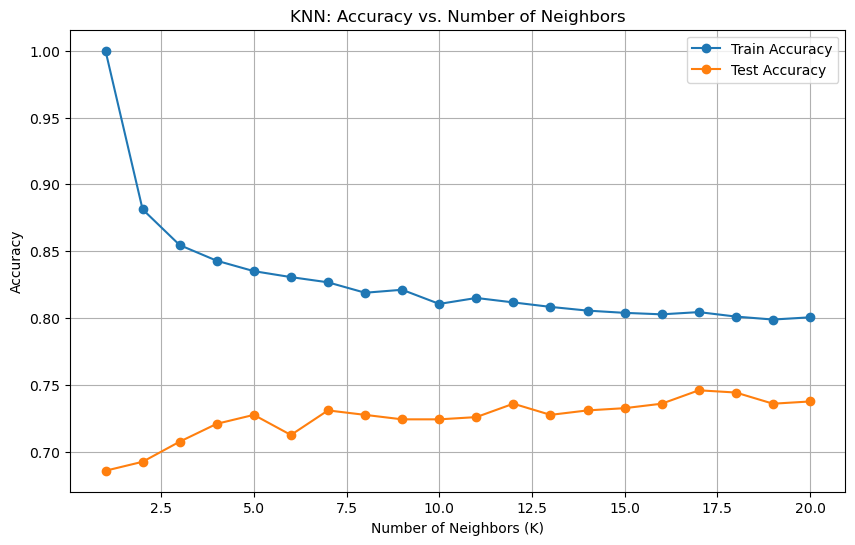

In [32]:
# Best k value

neighbors = np.arange(1, 21)
train_accuracies = []
test_accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracies.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(neighbors, test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy vs. Number of Neighbors")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Cross Validation

best_knn_scores = cross_val_score(best_knn_model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [34]:
print("KNN Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (best_knn_scores.mean(), best_knn_scores.std()))

KNN Cross-Validation Accuracy: 0.81 (+/- 0.03)


In [35]:
# Overfitting Check

y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

Train Set Accuracy: 0.8472686733556298
Test Set Accuracy: 0.774247491638796


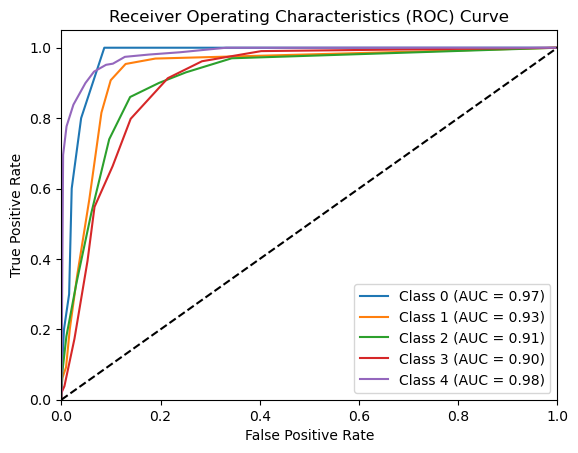

In [36]:
# ROC Curve and AUC

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = best_knn_model.predict_proba(X_test)

# Binarizing the true label for multi class classification
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

plt.figure()

# Getting the number of classes
n_classes = y_test_binarized.shape[1]

# Looping through each class
for i in range(n_classes):
    
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
    
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

The ROC curves for most of the classes are close to the top left corner, indicating that the model performs well.

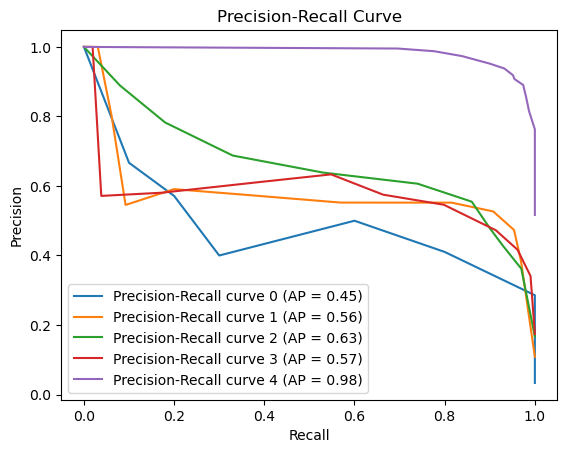

In [37]:
# Precision-Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure()

for i in range(n_classes):
    
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    
    average_precision = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    plt.plot(recall, precision, label=f"Precision-Recall curve {i} (AP = {average_precision:.2f})")
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

We observe that the precision between the classes is quite different, which indicates that the predictions for each class do not have the same accuracy.

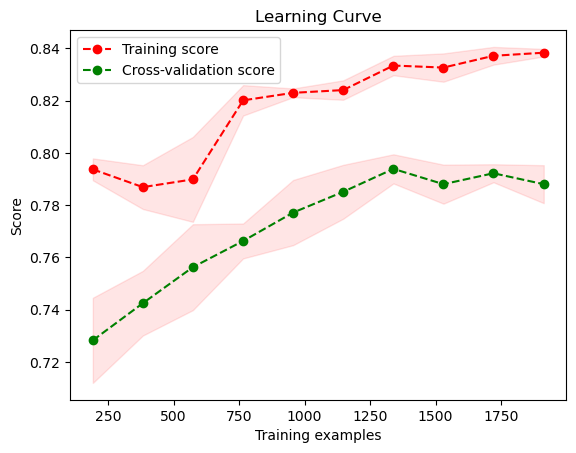

In [38]:
# Learning Curve

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_knn_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, "o--", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o--", color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")

plt.show()

The results in the graph indicate that the model tends toward overfitting; however, there is no significant difference between the cross-validation score and the training score.

In [39]:
# Error Analysis

misclassified = X_test[y_test != y_pred]

error_analysis_df = pd.DataFrame(misclassified, columns=X.columns)
error_analysis_df["Actual"] = y_test[y_test != y_pred]
error_analysis_df["Predicted"] = y_pred[y_test != y_pred]

print(error_analysis_df)

      Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
2342   15       0          0                  0        10.588715        15   
1708   18       1          1                  2        16.208658         1   
321    15       1          0                  1        17.006354        11   
1472   15       1          0                  2        14.372075        23   
1703   17       0          0                  1         4.286001        14   
...   ...     ...        ...                ...              ...       ...   
2326   16       1          0                  2        11.136888         4   
1989   15       0          0                  1        16.409226         2   
1743   17       0          0                  3        11.417061         7   
2008   15       1          0                  1        14.041944        13   
2067   15       1          1                  3        14.078718         9   

      Tutoring  ParentalSupport  Extracurricular  Sports  Music

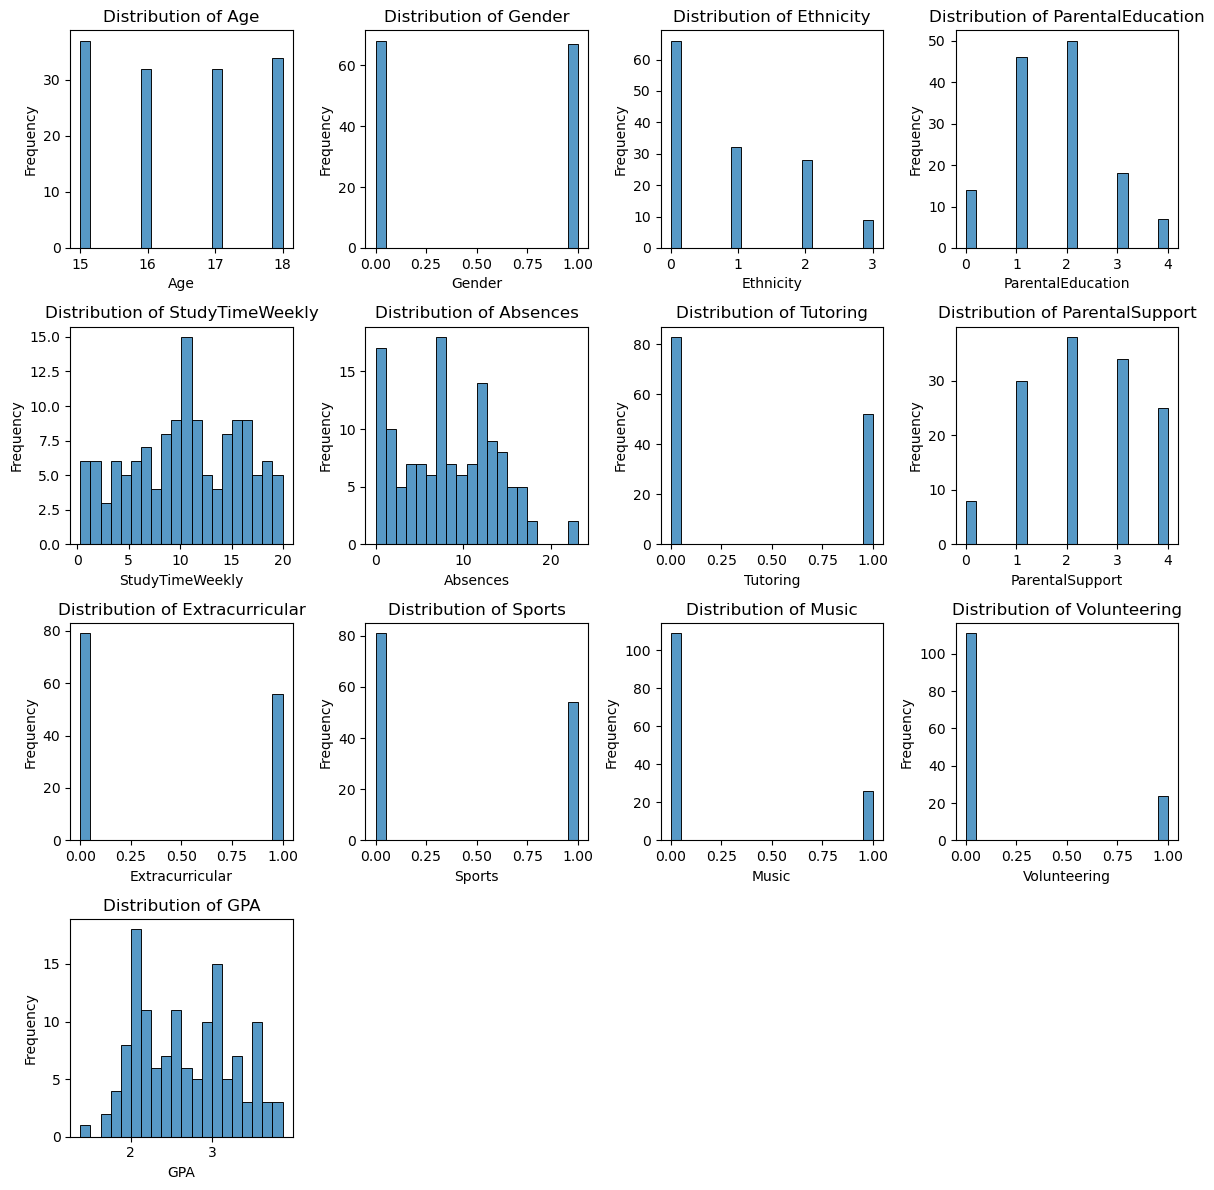

In [40]:
features = df.drop(columns=["GradeClass"]).columns

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12), sharex=False, sharey=False)

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.histplot(error_analysis_df[feature], kde=False, bins=20, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature}")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Frequency")
    
for i in range(len(features), 16):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])
    
plt.tight_layout()
plt.show()

### Random Forests

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_model = RandomForestClassifier(random_state=42)

In [43]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [44]:
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [45]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: :", best_score)

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: : 0.9910955927995033


In [46]:
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

y_pred_rf = best_rf_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_rf))

Accuracy:  0.9866220735785953


In [47]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.93      0.98      0.96        65
           2       0.99      0.98      0.98       100
           3       0.98      1.00      0.99       104
           4       1.00      1.00      1.00       309

    accuracy                           0.99       598
   macro avg       0.98      0.94      0.96       598
weighted avg       0.99      0.99      0.99       598



#### Analysis

In [49]:
accuracy_score(y_test, y_pred_rf)

0.9866220735785953

In [50]:
confusion_matrix(y_test, y_pred_rf)

array([[ 15,   5,   0,   0,   0],
       [  0,  64,   1,   0,   0],
       [  0,   0,  98,   2,   0],
       [  0,   0,   0, 104,   0],
       [  0,   0,   0,   0, 309]], dtype=int64)

In [51]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.93      0.98      0.96        65
           2       0.99      0.98      0.98       100
           3       0.98      1.00      0.99       104
           4       1.00      1.00      1.00       309

    accuracy                           0.99       598
   macro avg       0.98      0.94      0.96       598
weighted avg       0.99      0.99      0.99       598



In [52]:
# Cross Validation

best_rf_scores = cross_val_score(best_rf_model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [54]:
print("Random Forest Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (best_rf_scores.mean(), best_rf_scores.std()))

Random Forest Cross-Validation Accuracy: 0.99 (+/- 0.01)


In [48]:
# Overfitting Check

y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

Train Set Accuracy: 1.0
Test Set Accuracy: 0.9866220735785953


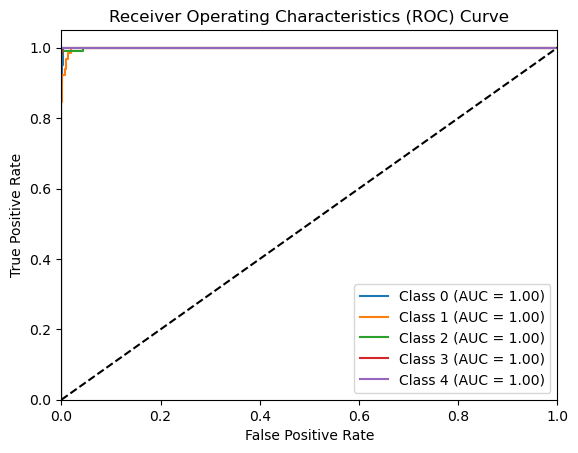

In [55]:
# ROC Curve and AUC

y_pred_proba = best_rf_model.predict_proba(X_test)

# Binarizing the true label for multi class classification
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

plt.figure()

# Getting the number of classes
n_classes = y_test_binarized.shape[1]

# Looping through each class
for i in range(n_classes):
    
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
    
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

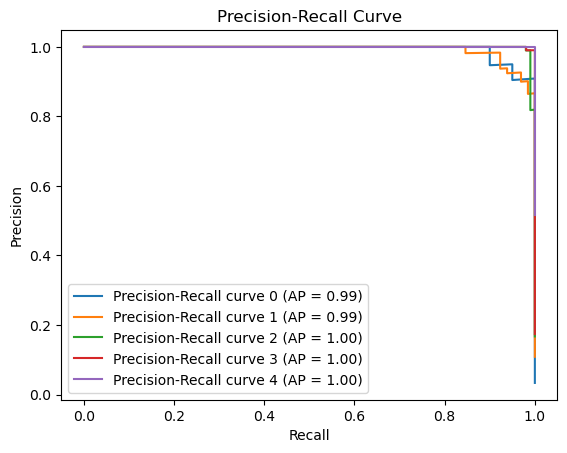

In [57]:
# Precision-Recall Curve

plt.figure()

for i in range(n_classes):
    
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    
    average_precision = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    plt.plot(recall, precision, label=f"Precision-Recall curve {i} (AP = {average_precision:.2f})")
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

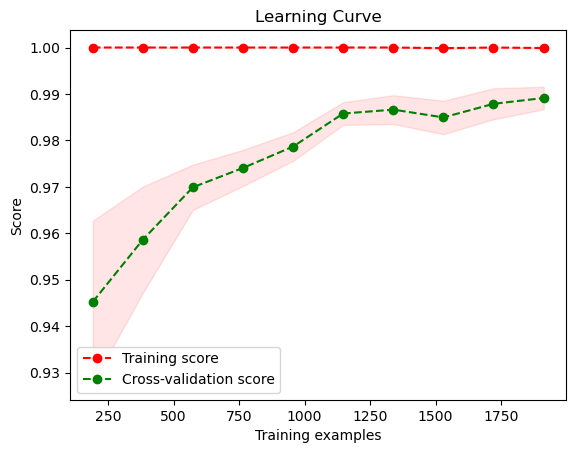

In [59]:
# Learning Curve

train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, "o--", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o--", color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")

plt.show()

In [60]:
# Error Analysis

misclassified = X_test[y_test != y_pred_rf]

error_analysis_df = pd.DataFrame(misclassified, columns=X.columns)
error_analysis_df["Actual"] = y_test[y_test != y_pred_rf]
error_analysis_df["Predicted"] = y_pred_rf[y_test != y_pred_rf]

print(error_analysis_df)

      Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
1557   17       0          0                  2         9.083349         8   
2013   18       0          1                  1        16.284175         4   
1992   17       0          2                  2         5.419264         6   
307    16       1          2                  0         9.926455         4   
2045   18       1          2                  2        11.785347         1   
1888   17       1          0                  1        10.087614         8   
1658   15       1          3                  2        18.871304         1   
2326   16       1          0                  2        11.136888         4   

      Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
1557         0                1                1       1      0             0   
2013         0                3                1       0      0             0   
1992         0                1                0      

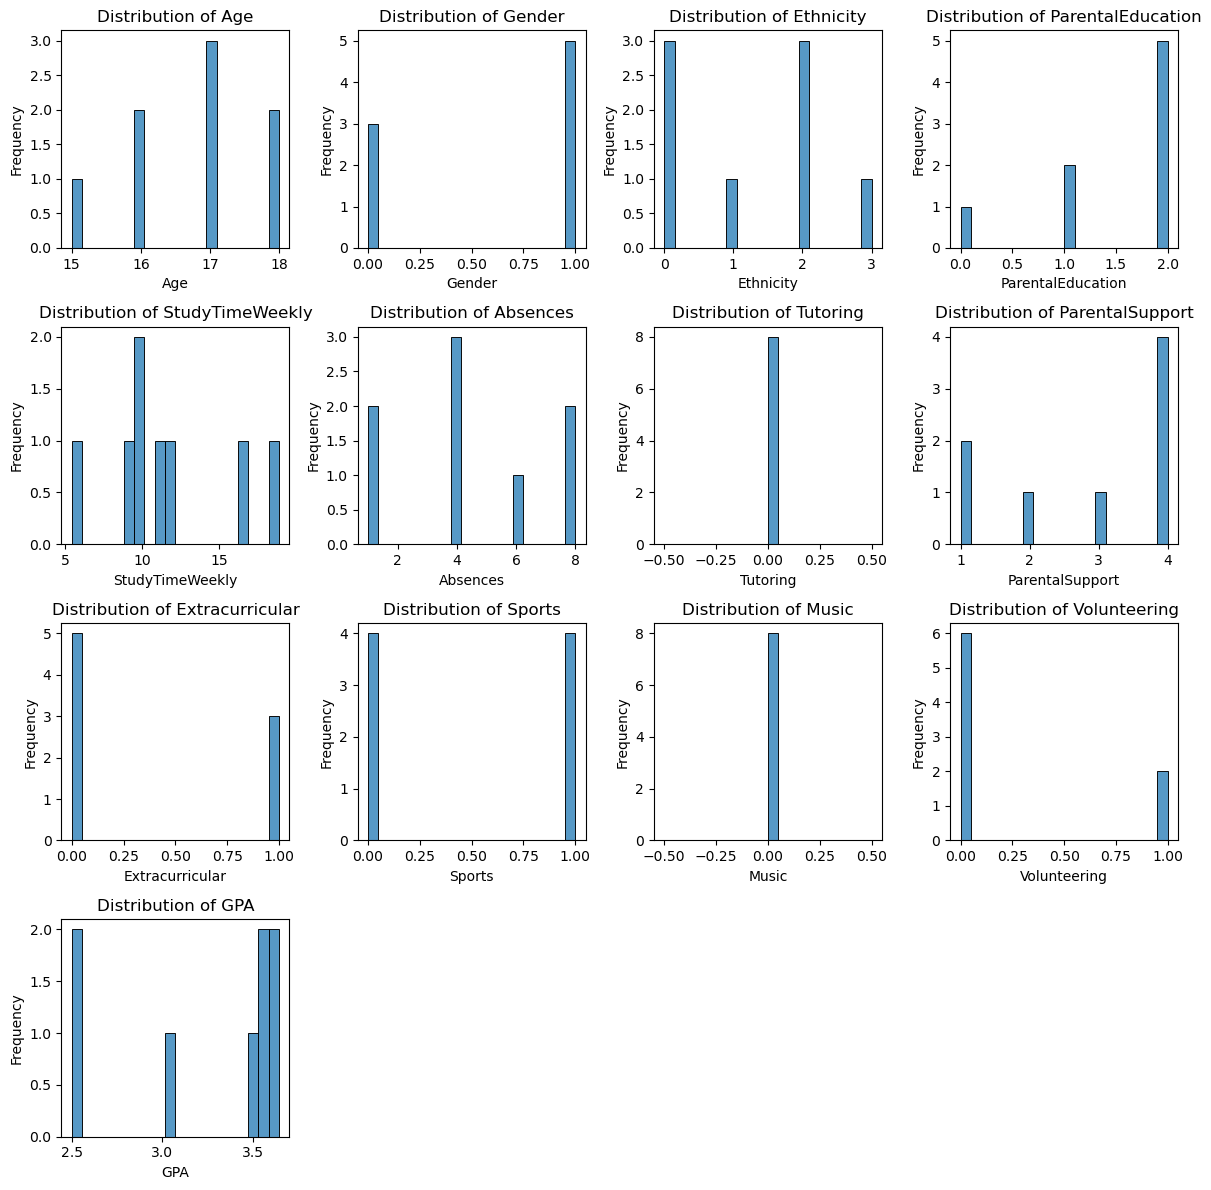

In [61]:
features = df.drop(columns=["GradeClass"]).columns

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12), sharex=False, sharey=False)

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.histplot(error_analysis_df[feature], kde=False, bins=20, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature}")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Frequency")
    
for i in range(len(features), 16):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])
    
plt.tight_layout()
plt.show()